In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
education = pd.read_csv('./dataset/education.csv')

- target: value
- 수치예측

In [4]:
education

,Year,State,Type,Length,Expense,Value
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
1,2013,Alabama,Private,4-year,Room/Board,8503
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
4,2013,Alabama,Public In-State,4-year,Room/Board,8473
...,...,...,...,...,...,...
3543,2021,Wyoming,Public In-State,2-year,Fees/Tuition,3987
3544,2021,Wyoming,Public In-State,4-year,Room/Board,9799
3545,2021,Wyoming,Public Out-of-State,2-year,Fees/Tuition,9820
3546,2021,Wyoming,Public Out-of-State,4-year,Fees/Tuition,14710


In [5]:
#null값 확인
education.isnull().sum()

Year       0
State      0
Type       0
Length     0
Expense    0
Value      0
dtype: int64

In [6]:
education.columns

Index(['Year', 'State', 'Type', 'Length', 'Expense', 'Value'], dtype='object')

In [9]:
for i in education.columns:
    print(i)
    print(education[i].value_counts())
    print(".".center(40,'-'))

Year
2013    403
2014    403
2015    403
2016    403
2017    401
2018    398
2019    396
2020    396
2021    345
Name: Year, dtype: int64
-------------------.--------------------
State
Alabama                 71
Montana                 71
New Hampshire           71
New Jersey              71
New Mexico              71
New York                71
North Carolina          71
North Dakota            71
Ohio                    71
Oklahoma                71
Oregon                  71
Pennsylvania            71
Rhode Island            71
South Carolina          71
South Dakota            71
Tennessee               71
Texas                   71
Utah                    71
Vermont                 71
Virginia                71
Washington              71
West Virginia           71
Wisconsin               71
Nebraska                71
Missouri                71
Illinois                71
California              71
Connecticut             71
Arkansas                71
Arizona                 71
Flori

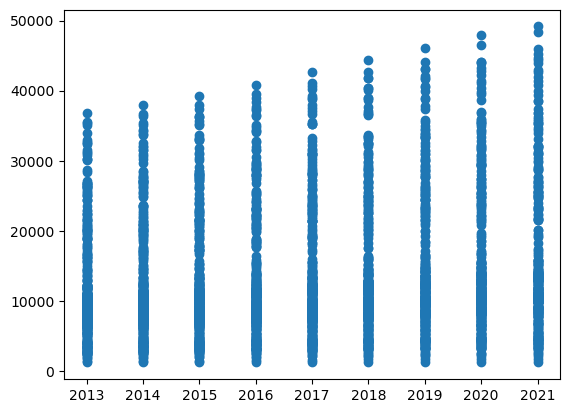

In [11]:
# 연도별 총 학비 추이
plt.scatter(education.Year,education.Value)
plt.show()

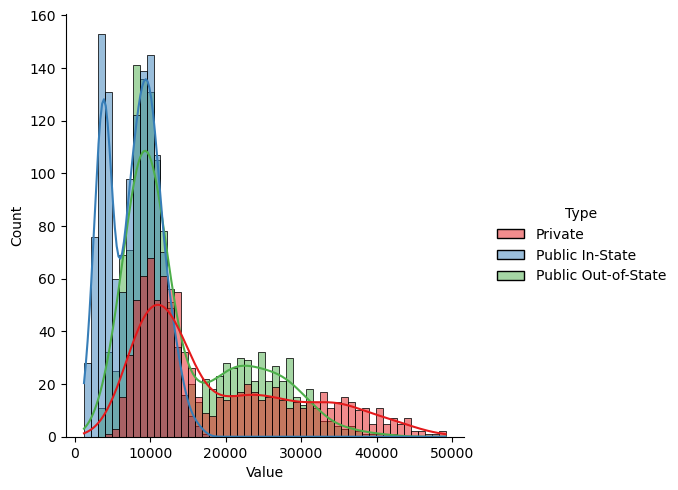

In [13]:
#공립, 사립, 주립별 가격 추이  /사립이 비싸고 주립이저렴/주내와 주외의 학생 가격도 다름
sns.displot(data=education,kde=True,x='Value',hue='Type',palette='Set1',)
plt.show()

- 데이터 세트 분리
- 계층적 샘플링

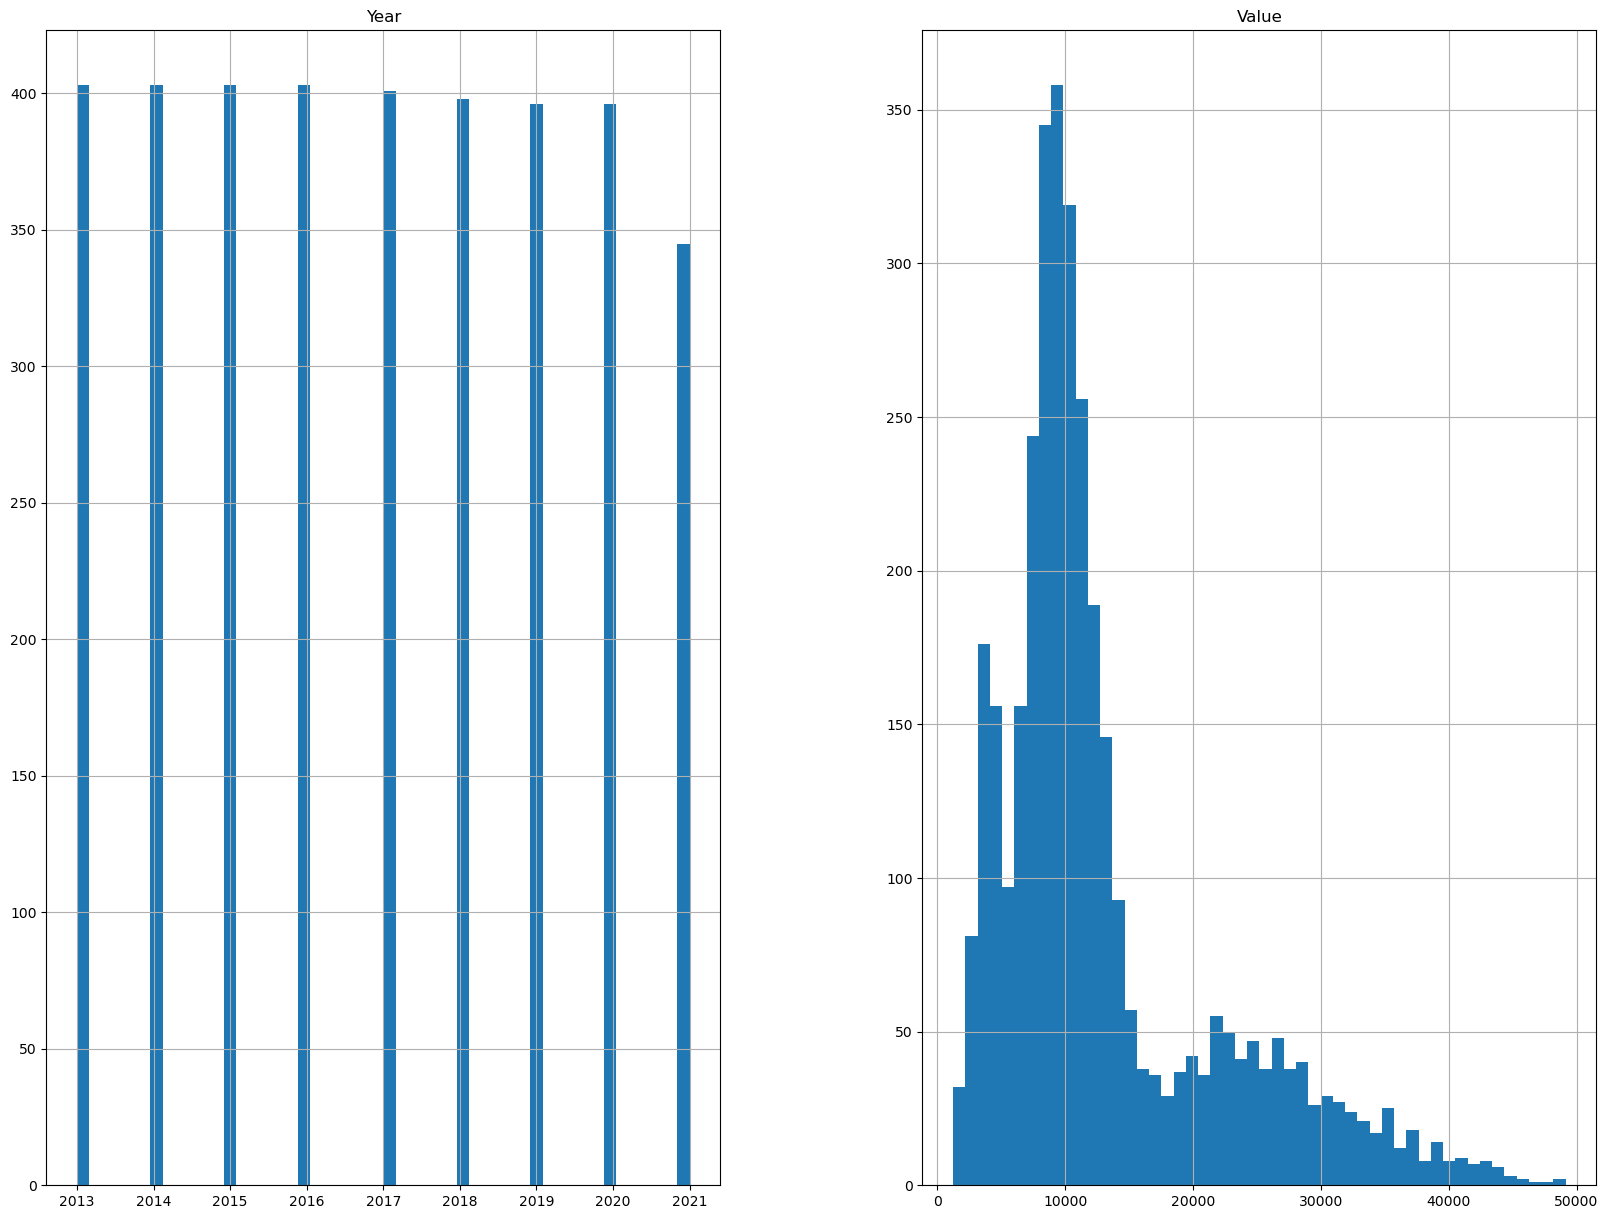

In [18]:
education.hist(bins=50, figsize=(20, 15))
plt.show()

In [5]:
education.describe()

,Year,Value
count,3548.000000,3548.000000
mean,2016.923337,13027.720124
std,2.553910,8734.568645
min,2013.000000,1225.000000
25%,2015.000000,7756.750000
50%,2017.000000,10203.500000
75%,2019.000000,14830.750000
max,2021.000000,49152.000000


In [41]:
bins = [0, 7000, 9500, 12000, 22000, np.inf]
labels = [1, 2, 3, 4, 5]
education['Value'] = pd.cut(education['Value'], bins=bins, labels=labels)

In [44]:
education['State'].value_counts()

Alabama                 71
Montana                 71
New Hampshire           71
New Jersey              71
New Mexico              71
New York                71
North Carolina          71
North Dakota            71
Ohio                    71
Oklahoma                71
Oregon                  71
Pennsylvania            71
Rhode Island            71
South Carolina          71
South Dakota            71
Tennessee               71
Texas                   71
Utah                    71
Vermont                 71
Virginia                71
Washington              71
West Virginia           71
Wisconsin               71
Nebraska                71
Missouri                71
Illinois                71
California              71
Connecticut             71
Arkansas                71
Arizona                 71
Florida                 71
Georgia                 71
Hawaii                  71
Idaho                   71
Mississippi             71
Indiana                 71
Iowa                    71
K

In [42]:
education['Value'].value_counts()

2    805
3    762
1    701
4    696
5    584
Name: Value, dtype: int64

In [8]:
#지도로 시각화 표현
education.groupby('State')['Value'].mean()

State
Alabama                 11362.732394
Alaska                  11629.174603
Arizona                 11195.957746
Arkansas                10233.816901
California              15196.647887
Colorado                13517.126761
Connecticut             17435.211268
Delaware                13834.622951
District of Columbia    18880.200000
Florida                 11356.098592
Georgia                 12563.000000
Hawaii                  12524.309859
Idaho                    8609.197183
Illinois                15167.633803
Indiana                 14066.450704
Iowa                    12403.718310
Kansas                  10589.464789
Kentucky                12941.281690
Louisiana               13355.577465
Maine                   14378.971831
Maryland                15332.323944
Massachusetts           17282.098592
Michigan                13881.816901
Minnesota               12642.295775
Mississippi              9657.126761
Missouri                11174.746479
Montana                 11658.94

In [75]:
education[education.groupby(['State', 'Expense'])['Value'].mean()]

KeyError: "None of [Float64Index([12503.977272727272,  9502.925925925925, 13051.888888888889,\n               9732.222222222223, 11514.181818181818,  10677.37037037037,\n              11302.954545454546,  8491.518518518518, 16240.704545454546,\n              13495.222222222223,\n              ...\n              16496.090909090908, 10425.592592592593,            16743.5,\n              11448.814814814816, 10406.318181818182,             9549.0,\n              14844.386363636364,  8677.925925925925,           8283.425,\n               9707.222222222223],\n             dtype='float64', length=102)] are in the [columns]"

<AxesSubplot:xlabel='Value', ylabel='State'>

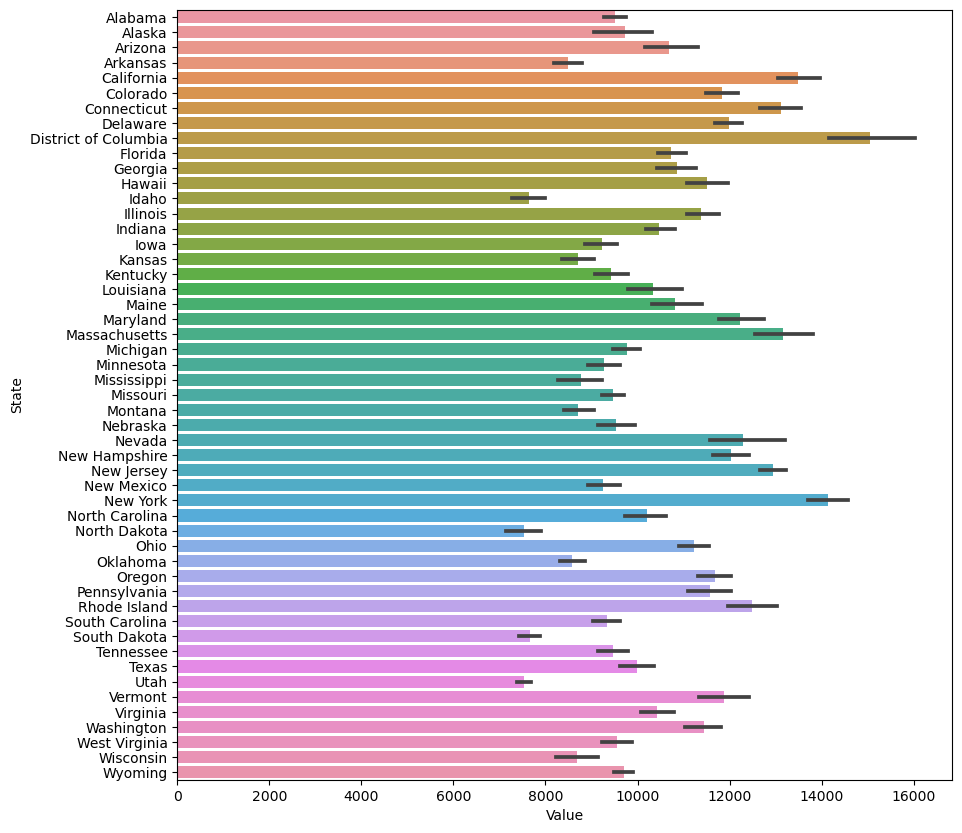

In [49]:
play=education.groupby(['State','Expense']).mean()

edu = education['Expense'] == 'Room/Board'

a=education[edu]

plt.figure(figsize=(10, 10))
sns.barplot(y=a.State, x=a.Value)

In [64]:
a

,Year,State,Type,Length,Expense,Value
398,2013,Wyoming,Public In-State,4-year,Fees/Tuition,3642
801,2014,Wyoming,Public In-State,4-year,Fees/Tuition,3756
1204,2015,Wyoming,Public In-State,4-year,Fees/Tuition,3968
1607,2016,Wyoming,Public In-State,4-year,Fees/Tuition,4178
2008,2017,Wyoming,Public In-State,4-year,Fees/Tuition,4311
...,...,...,...,...,...,...
2571,2019,Massachusetts,Private,4-year,Fees/Tuition,46016
3157,2020,Vermont,Private,4-year,Fees/Tuition,46445
2967,2020,Massachusetts,Private,4-year,Fees/Tuition,47980
3508,2021,Vermont,Private,4-year,Fees/Tuition,48300


<AxesSubplot:xlabel='Value', ylabel='State'>

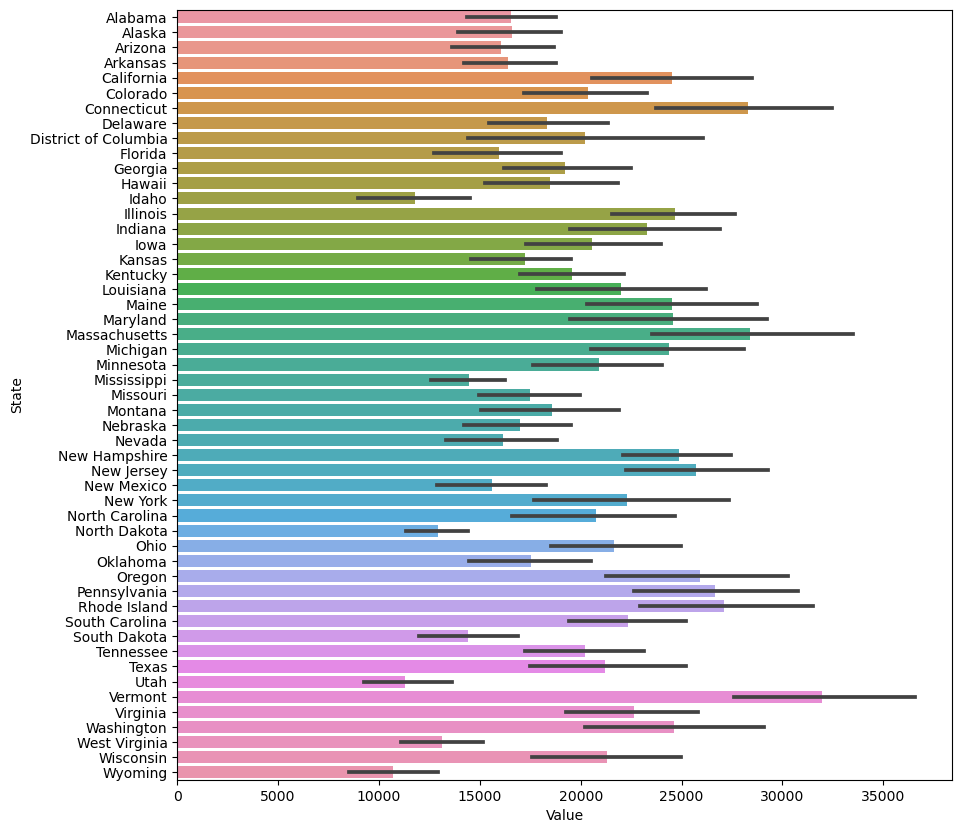

In [68]:
plt.figure(figsize=(10, 10))
sns.barplot(y=a.State, x=a.Value)

<AxesSubplot:xlabel='Value', ylabel='State'>

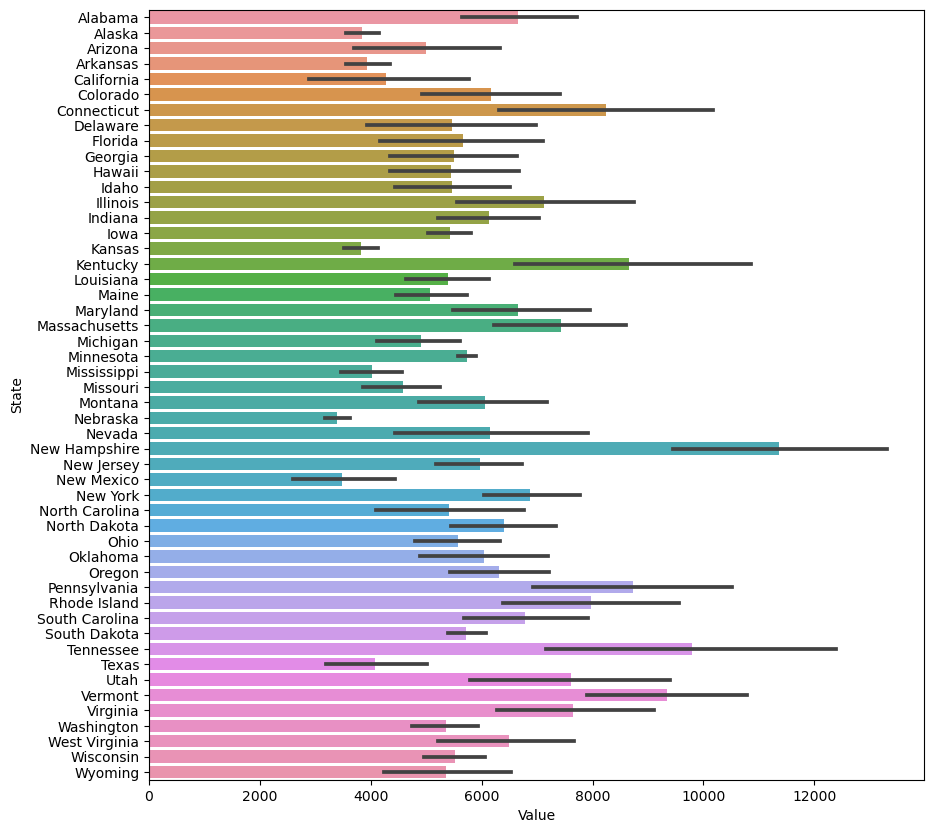

In [67]:
play=education.groupby(['State','Expense']).mean()

edu = (education['Expense'] == 'Fees/Tuition') & (education['Length'] == '4-year')
edu2 = (education['Expense'] == 'Fees/Tuition') & (education['Length'] == '2-year')

a=education[edu]
b=education[edu2]

plt.figure(figsize=(10, 10))

sns.barplot(y=b.State, x=b.Value)

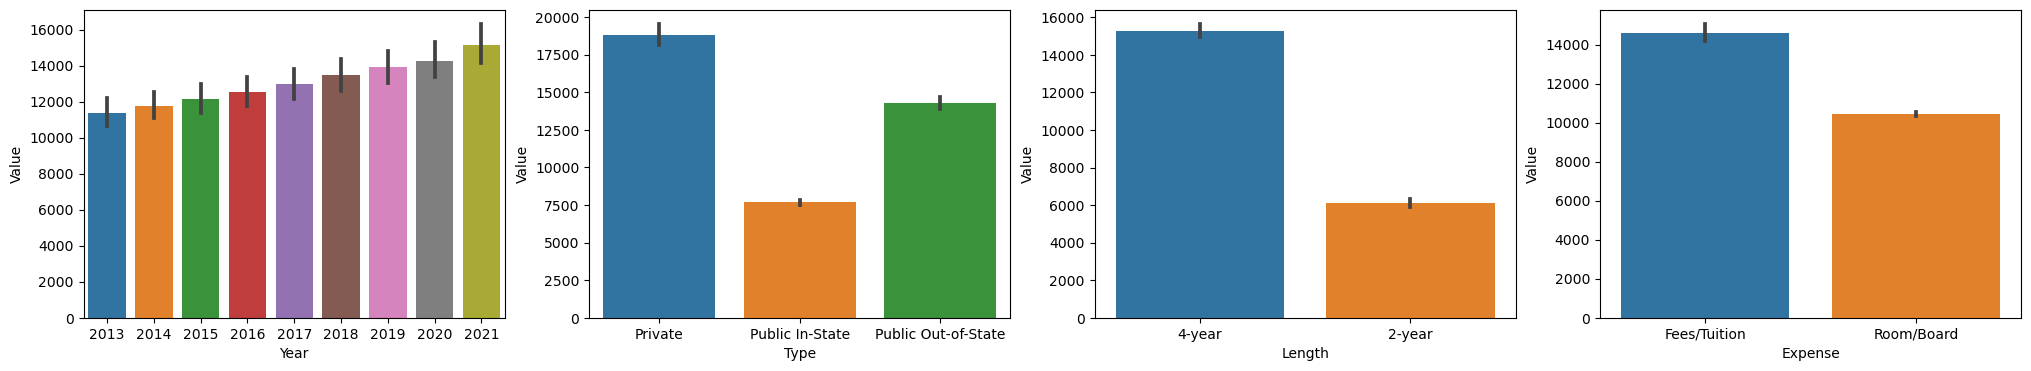

In [52]:
cat_columns = ['Year','Type','Length','Expense']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25, 4))
for i, column in enumerate(cat_columns):
    sns.barplot(data=education, x=column, y='Value', ax=axes[i])
plt.show()

In [73]:
import tensorflow as tf
import numpy as np

ModuleNotFoundError: No module named 'tensorflow'

In [59]:
education

,Year,State,Type,Length,Expense,Value
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
1,2013,Alabama,Private,4-year,Room/Board,8503
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
4,2013,Alabama,Public In-State,4-year,Room/Board,8473
...,...,...,...,...,...,...
3543,2021,Wyoming,Public In-State,2-year,Fees/Tuition,3987
3544,2021,Wyoming,Public In-State,4-year,Room/Board,9799
3545,2021,Wyoming,Public Out-of-State,2-year,Fees/Tuition,9820
3546,2021,Wyoming,Public Out-of-State,4-year,Fees/Tuition,14710


In [ ]:
pred_value = education[education]

In [ ]:
idx_1 = education[education['Leng']]

In [ ]:
education.drop

In [70]:
years=education[education['Length']=='2-year'].index
education_=education.drop(years)

In [71]:
education_

,Year,State,Type,Length,Expense,Value
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
1,2013,Alabama,Private,4-year,Room/Board,8503
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
4,2013,Alabama,Public In-State,4-year,Room/Board,8473
6,2013,Alabama,Public Out-of-State,4-year,Fees/Tuition,20380
...,...,...,...,...,...,...
3541,2021,Wisconsin,Public Out-of-State,4-year,Fees/Tuition,26970
3542,2021,Wisconsin,Public Out-of-State,4-year,Room/Board,9093
3544,2021,Wyoming,Public In-State,4-year,Room/Board,9799
3546,2021,Wyoming,Public Out-of-State,4-year,Fees/Tuition,14710


In [88]:
X

,Year,State,Type,Length,Expense
0,2013,Alabama,Private,4-year,Fees/Tuition
1,2013,Alabama,Private,4-year,Room/Board
3,2013,Alabama,Public In-State,4-year,Fees/Tuition
4,2013,Alabama,Public In-State,4-year,Room/Board
6,2013,Alabama,Public Out-of-State,4-year,Fees/Tuition
...,...,...,...,...,...
3541,2021,Wisconsin,Public Out-of-State,4-year,Fees/Tuition
3542,2021,Wisconsin,Public Out-of-State,4-year,Room/Board
3544,2021,Wyoming,Public In-State,4-year,Room/Board
3546,2021,Wyoming,Public Out-of-State,4-year,Fees/Tuition


In [102]:
X = education.drop('Value', axis=1)
y = education['Value']

In [103]:
X.shape

(3548, 5)

In [104]:
X

,Year,State,Type,Length,Expense
0,2013,0,0,0,0
1,2013,0,0,0,1
2,2013,0,1,1,0
3,2013,0,1,0,0
4,2013,0,1,0,1
...,...,...,...,...,...
3543,2021,50,1,1,0
3544,2021,50,1,0,1
3545,2021,50,2,1,0
3546,2021,50,2,0,0


In [105]:
y

0       13983
1        8503
2        4048
3        8073
4        8473
        ...  
3543     3987
3544     9799
3545     9820
3546    14710
3547     9799
Name: Value, Length: 3548, dtype: int64

In [97]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [98]:
import sklearn

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [106]:
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)
rf_reg = RandomForestRegressor(random_state=42)

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
lin_scores = cross_val_score(lin_reg,X, y, scoring="neg_mean_squared_error", cv=10, n_jobs=-1)
lin_rmse = np.sqrt(-lin_scores.mean())
lin_rmse

6418.346042282393

In [109]:
tree_scores = cross_val_score(tree_reg, X, y, scoring="neg_mean_squared_error", cv=10, n_jobs=-1)
tree_rmse = np.sqrt(-tree_scores.mean())
tree_rmse

790.0040591987923

In [110]:
rf_scores = cross_val_score(rf_reg, X, y, scoring="neg_mean_squared_error", cv=10, n_jobs=-1)
rf_rmse = np.sqrt(-rf_scores.mean())
rf_rmse

862.0041499481318

### 인코딩

In [95]:
education[['State','Type','Length','Expense']] = education[['State','Type','Length','Expense']].apply(lambda x: pd.factorize(x)[0])

In [96]:
education

,Year,State,Type,Length,Expense,Value
0,2013,0,0,0,0,13983
1,2013,0,0,0,1,8503
2,2013,0,1,1,0,4048
3,2013,0,1,0,0,8073
4,2013,0,1,0,1,8473
...,...,...,...,...,...,...
3543,2021,50,1,1,0,3987
3544,2021,50,1,0,1,9799
3545,2021,50,2,1,0,9820
3546,2021,50,2,0,0,14710
